# 파이썬 기반의 AI를 위한 기초수학, 확률및통계

In [1]:
## 강봉주 
## bonjour.kang@gmail.com
##
## 특별한 분포
##

In [2]:
# 필요한 패키지
import numpy as np
import matplotlib.pyplot as plt

import scipy
from scipy import linalg as la
import scipy.stats as ss
import scipy.special

# 한글출력
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 필요한 패키지 2
from pgmpy.factors.discrete import JointProbabilityDistribution as JPD
import sympy

scipy.__version__

'1.3.2'

## 베르누이 분포

In [3]:
# 표본의 개수: 10
trials = 1
event_prob = 1/6
size = 10
np.random.seed(123)
result = np.random.binomial(n=trials,p=event_prob, size=size)
result

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [4]:
# 성공 건수
np.sum(result)

1

## 이항 분포

$Pr(Y=y)=f(y)=$
$\begin{pmatrix}
n \\
y
\end{pmatrix}$ 
$p^{y} (1-p)^{n-y}$ 
$y=0, ..., n$

In [5]:
# 예제의 해답
A = [2, 3]
trials = 5
scipy.special.comb(trials, A)

array([10., 10.])

In [6]:
# 확률밀도 함수 확인
trials = 5
A = np.arange(0, 6)
event_prob = 1/3

ss.binom.pmf(A, n=trials, p=event_prob).sum().round(3)

1.0

In [7]:
# 적률 생성 함수를 이용한 이항 분포의 평균과 분산
p, t, n = sympy.symbols('p, t, n')
expr = ((1-p)+p*sympy.exp(t))**n

# 1차 적률(기대값)
M1 = sympy.Lambda(t, expr.diff(t).simplify())
EX = M1(0)
EX

n*p

In [8]:
# 2차 적률
M2 = sympy.Lambda(t, expr.diff(t, t).simplify())
EXX = M2(0)
EXX

n*p*(n*p - p + 1)

In [9]:
# 분산
(EXX- EX**2).simplify()

n*p*(1 - p)

## 정규 분포

$ f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $, $-\infty < x < \infty$

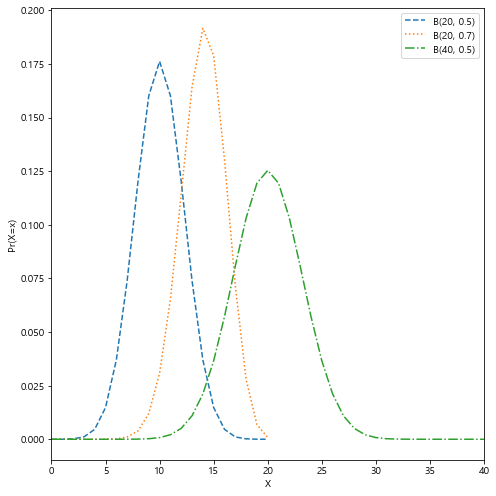

In [10]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_xlim(0, 40)
ax.plot(np.arange(21),ss.binom.pmf(np.arange(21), n=20, p=0.5), ls='--',  label='B(20, 0.5)')
ax.plot(np.arange(21),ss.binom.pmf(np.arange(21), n=20, p=0.7), ls=':',  label='B(20, 0.7)')
ax.plot(np.arange(41),ss.binom.pmf(np.arange(41), n=40, p=0.5), ls='-.',  label='B(40, 0.5)')
ax.set_xlabel("X")
ax.set_ylabel("Pr(X=x)")
ax.legend()

plt.tight_layout()

In [11]:
# 확률값 구하기
np.round(ss.norm.cdf(1) - ss.norm.cdf(-1), 3)

0.683

In [12]:
np.round(ss.norm.cdf(2) - ss.norm.cdf(-2), 3)

0.954

In [13]:
np.round(ss.norm.cdf(3) - ss.norm.cdf(-3), 3)

0.997

In [14]:
# 특정 구간의 확률 계산
np.round(ss.norm.cdf(3) - ss.norm.cdf(-1), 3)

0.84